<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/FrozenLake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


In [2]:

# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode=None)
n_actions = env.action_space.n
n_states = env.observation_space.n


In [3]:
def print_frozen_lake_layout(env):
    desc = env.unwrapped.desc.astype(str)
    size = desc.shape[0]

    for i in range(size):
        row = ""
        for j in range(size):
            cell = f" {desc[i][j]} "
            row += f"|{cell}"
        row += "|"
        print(row)
        print("-" * len(row))
print_frozen_lake_layout(env)

| S | F | F | F |
-----------------
| F | H | F | H |
-----------------
| F | F | F | H |
-----------------
| H | F | F | G |
-----------------


In [5]:
# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration probability
epsilon_min = 0.01
epsilon_decay = 0.995
num_episodes = 5000


In [6]:

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Store rewards per episode
rewards_per_episode = []

# Q-learning loop
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-value
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Epsilon: {epsilon:.4f}, Avg Reward: {np.mean(rewards_per_episode[-100:]):.2f}")


Episode 500/5000, Epsilon: 0.0816, Avg Reward: 0.17
Episode 1000/5000, Epsilon: 0.0100, Avg Reward: 0.67
Episode 1500/5000, Epsilon: 0.0100, Avg Reward: 0.67
Episode 2000/5000, Epsilon: 0.0100, Avg Reward: 0.71
Episode 2500/5000, Epsilon: 0.0100, Avg Reward: 0.68
Episode 3000/5000, Epsilon: 0.0100, Avg Reward: 0.67
Episode 3500/5000, Epsilon: 0.0100, Avg Reward: 0.62
Episode 4000/5000, Epsilon: 0.0100, Avg Reward: 0.75
Episode 4500/5000, Epsilon: 0.0100, Avg Reward: 0.78
Episode 5000/5000, Epsilon: 0.0100, Avg Reward: 0.70


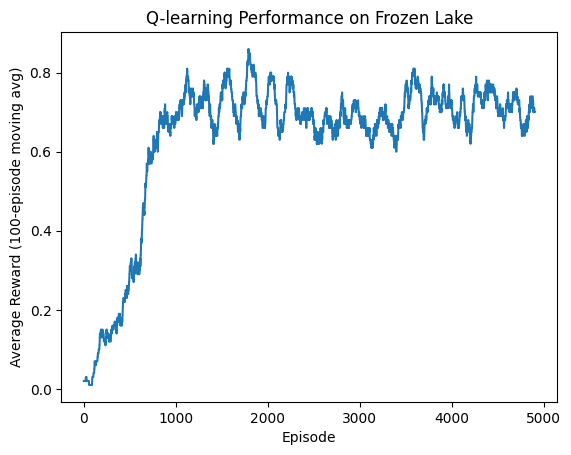

Learned Q-table:
[[5.09568679e-01 4.93868430e-01 4.78989047e-01 4.87371176e-01]
 [2.34708307e-01 2.00895221e-01 1.56566138e-01 4.37270217e-01]
 [3.98949448e-01 7.39609484e-02 1.18737344e-01 1.49122609e-01]
 [5.97237120e-02 0.00000000e+00 2.93238483e-04 3.07103272e-05]
 [5.37639244e-01 3.14836363e-01 3.90846094e-01 3.84865932e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.81391422e-01 7.19994892e-02 3.84898927e-01 1.21718006e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.88288680e-01 4.65975453e-01 4.26366058e-01 5.80055033e-01]
 [3.63673850e-01 6.09064198e-01 4.56430332e-01 4.10934747e-01]
 [6.00313909e-01 4.02982668e-01 3.61997075e-01 1.57521391e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.42778575e-01 5.19314486e-01 7.50838804e-01 5.83792802e-01]
 [6.59803795e-01 8.84486005e-01 7.10366283e-01 7.22112558e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

In [13]:
# Plot learning curve
plt.plot(np.convolve(rewards_per_episode, np.ones(100)/100, mode='valid'))
plt.xlabel("Episode")
plt.ylabel("Average Reward (100-episode moving avg)")
plt.title("Q-learning Performance on Frozen Lake")
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)

# Value Iteration to find optimal utilities
V = np.zeros(n_states)
threshold = 1e-6
delta = float("inf")
env_unwrapped = env.unwrapped  # Get the raw environment

while delta > threshold:
    delta = 0
    for state in range(n_states):
        v = V[state]
        V[state] = max(sum(prob * (reward + gamma * V[next_state])
                          for prob, next_state, reward, _ in env_unwrapped.P[state][action])
                       for action in range(n_actions))
        delta = max(delta, abs(v - V[state]))

# Display optimal utility values
print("\n\n\nOptimal state values from Value Iteration:")
print(V)

# Compare max Q-values to optimal state values
print("State | Max Q-Value | Optimal V-Value | Difference")
print("---------------------------------------------------")
for state in range(n_states):
    max_q = np.max(Q[state, :])
    optimal_v = V[state]
    diff = abs(max_q - optimal_v)
    print(f"{state:5} | {max_q:10.4f} | {optimal_v:10.4f} | {diff:10.4f}")
